# SN Fits

In [1]:
import snpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import glob

%config InlineBackend.figure_format = 'retina'
print(f'SNooPy version: v{snpy.__version__}')

SNooPy version: v2.6.0


Number of calls to function has reached maxfev = 1400.


RuntimeError: Error:  Covariance Matrix is singular.  Either two or more parameters are degenerate or the model has become insensitive to one or more parameters.

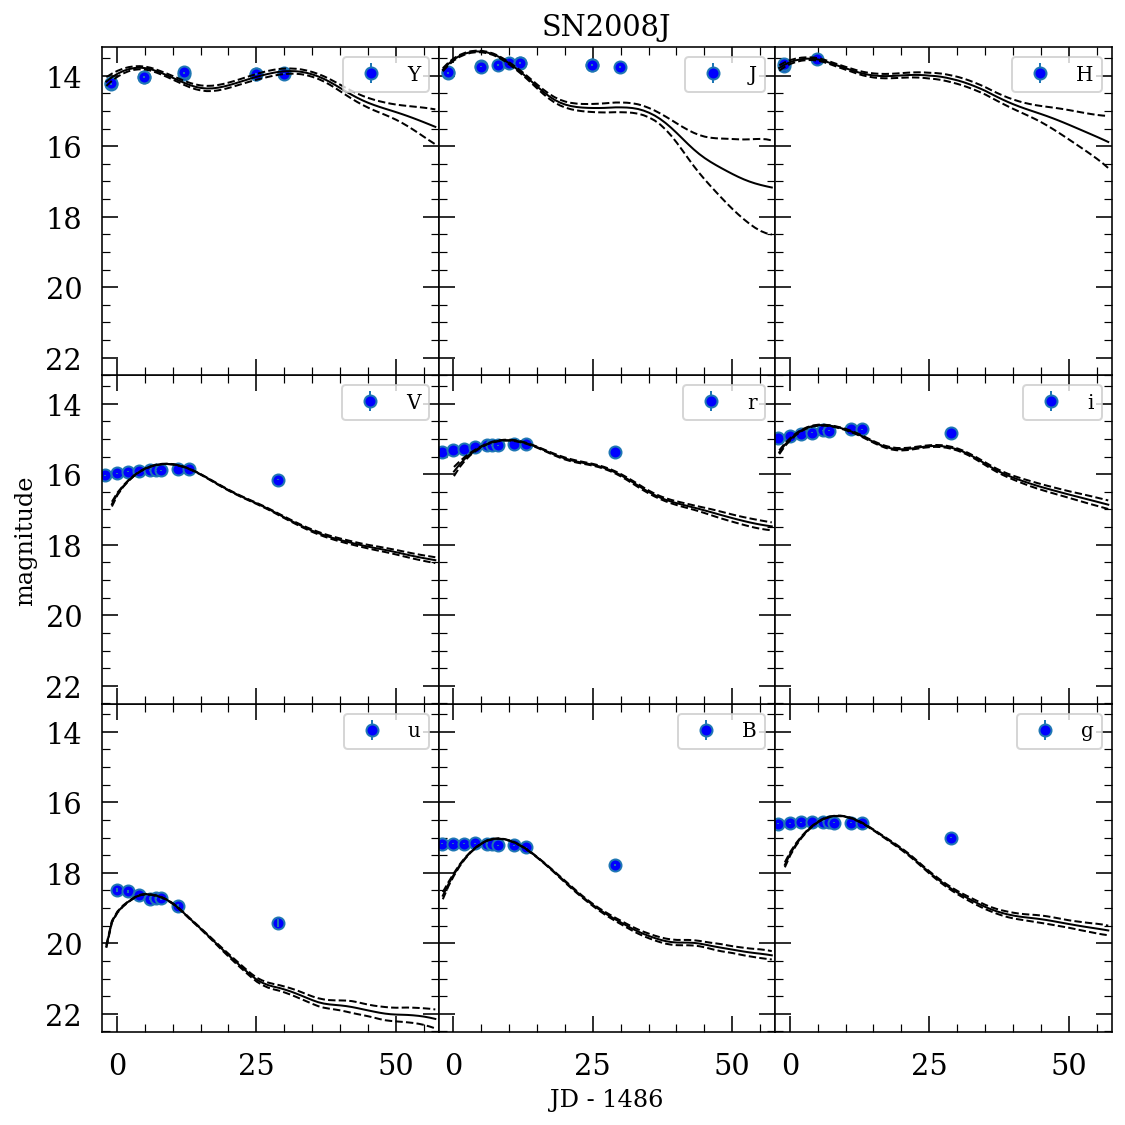

In [5]:
# SNe to remove
df1 = pd.read_csv('sne_wo_JorH.txt', names=['name', 'bands'], delim_whitespace=True)
df2 = pd.read_csv('sne_wo_opt_max.txt', names=['name', 'comment'], delim_whitespace=True)
df3 = pd.read_csv('sne_wo_nir_max.txt', names=['name', 'comment'], delim_whitespace=True)
sne2remove = list(df1.name.values) + list(df2.name.values) + list(df3.name.values)
files2remove = [f'csp_dr3/{name}_snpy.txt' for name in sne2remove]

sn_files = [file for file in glob.glob('csp_dr3/*.txt') if file not in files2remove]
print(f'Fitting {len(sn_files)} SNe ({len(files2remove)} from 134 CSP SNe removed using cuts)')

for sn_file in sn_files:
    
    # all bands
    sn = snpy.import_lc(sn_file)
    try:
        sn = snpy.import_lc(sn_file)    
        sn.choose_model('max_model', stype='dm15')
        sn.fit()
        sn.save(f'allbands_fits/{sn.name}.snpy')
        sn.plot(outfile=f'allbands_fits/{sn.name}.jpeg')
    except:
        print(f'{sn.name} failed with all bands')
        
    # grJH bands
    sn = snpy.import_lc(sn_file)
    try:
        nir_bands = [band for band in sn.allbands() if band in ['J', 'Jrc2', 'H']]
        bands2fit = ['g', 'r'] + nir_bands

        sn.choose_model('max_model', stype='dm15')
        sn.fit(bands2fit)  # fit only the bands in bands2fit
        sn.save(f'grJH_fits/{sn.name}.snpy')
        sn.plot(outfile=f'grJH_fits/{sn.name}.jpeg')
    except:
        print(f'{sn.name} failed with all bands')